<a href="https://colab.research.google.com/github/Keldrith/Semana_Solu-es_com_Python/blob/main/Semana_Solu%C3%A7%C3%B5es_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mercado Finaceiro B3
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Libs necessárias

#Pacotes Analise de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

#Pacotes Analises graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Função para data
from datetime import datetime

#Yfiance
import yfinance as yf
yf.pdr_override()

#Avisos
import warnings
warnings.filterwarnings('ignore')


In [ ]:
Dados = web.get_data_yahoo('PETR4.SA', period ='1y')

Dados.shape

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [ ]:
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,31.900000,31.950001,31.260000,31.830000,18.601570,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,18.671700,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958057,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729469,88013400
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285324,55687000


In [ ]:
#Estatistica descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.982262,30.522341,29.439365,29.996111,23.333845,8.200633e+07
std,3.650480,3.668572,3.612010,3.638080,3.547292,3.676417e+07
min,21.000000,22.110001,20.770000,21.469999,17.537958,2.876520e+07
25%,27.082500,27.592500,26.332500,26.990000,20.002679,5.629405e+07
50%,30.820000,31.389999,30.300000,30.655000,23.106971,7.285520e+07
75%,32.717501,33.507500,32.382501,32.967500,26.054999,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [ ]:
#
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-08 to 2023-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
#Média simples
Lista = [11,12,13,15,16,17]

from statistics import mean as Media
print(f'Media: {Media (Lista) }')


Media: 14


In [ ]:
#Periodo de média móvel
n=5

for intervalo in range(3):
  print(f'{intervalo}ª Dia: {sum(Lista[intervalo:n])/5}')

0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


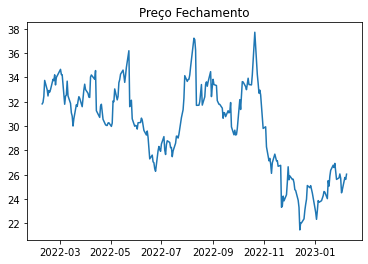

In [ ]:
#Plot

plt.plot(Dados['Close'])
plt.title('Preço Fechamento');

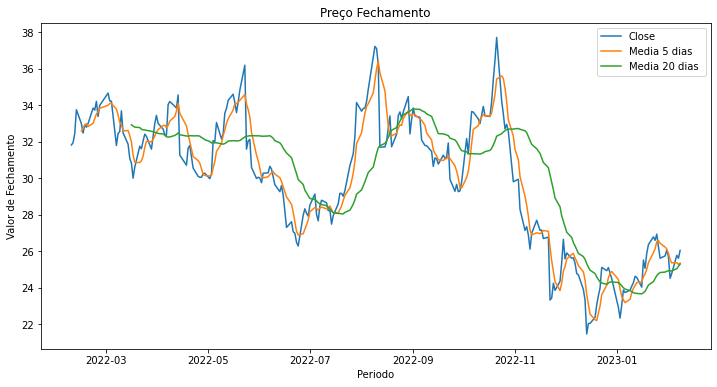

In [ ]:
#Função rolling
Periodo = 5
Dados['Close'].rolling(window=Periodo).mean()

#Tamanho da imagem
plt.figure(figsize=(12,6))
plt.plot(Dados['Close'])
plt.plot(Dados['Close'].rolling(window=Periodo).mean())
plt.plot(Dados['Close'].rolling(window=Periodo+20).mean())
plt.title('Preço Fechamento');
plt.legend(['Close', 'Media 5 dias','Media 20 dias '])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

In [ ]:
#Plotly
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling(window=Periodo).mean()

Figure = px.line(
    Dados,
    y='Close',
    title= 'Fechamento'

)
Figure.show()

In [ ]:
Figure_02 = go.Figure(
    data = go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=(dict(color='firebrick', width = 3))
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Perido',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

In [ ]:
#Candlestick Charts

Grafico=go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open= Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color= 'gray'
        )
    ]
)

Grafico.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)

Grafico.show()

In [ ]:
#Criando Relatório

Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True, 
    subplot_titles=('Cotação','Fechamento')
)

#Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Petrobras'

)

#Adicionando um grafico na primeira posição
Figura.add_trace(
    go.Candlestick(
            x=Dados.index,
            open= Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color= 'gray'
    ),
    row=1, col=1
)
Figura.update_layout(
    xaxis_rangeslider_visible=False,)

#Adicionando um grafico na segunda posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Media Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend= dict(
        orientation='h',
        yanchor ='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict(size=10)
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: @Keldrith',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)
Figura.show()

In [ ]:
#Kaleido
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Figura.write_image('Report_Finaceiro.pdf')